##### План выполнения проекта   
1.[Запускаем датасет и изучаем общую информацию по нему](#1);  
2.[Подготавливаем данные](#2);  
3.[Проводим Исследовательский анализ данных](#3);     
4.[Исследуем портрет пользователя каждого региона](#4);     
5 [Проверяем гипотезы](#5)      
6 [Общий вывод](#6)  

In [22]:
#запускаем первым шагом все предполагаемые билиотеки, при необходимости в ходе проекта дополняем этот пункт
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np
from scipy import stats as st
from math import factorial
import seaborn as sns

from pymystem3 import Mystem #вызываем библиотеку pymastem для проведения лемматизации
m = Mystem()

##### Шаг 1. Запускаем датасет и изучаем общую информацию по нему <a id="1"></a>

In [23]:
first_data = pd.read_csv('/content/games.csv') 
first_data.sample(n = 10, random_state = 1) 

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
14230,Rakushou! Pachi-Slot Sengen 5: Rio Paradise,PS2,2007.0,Misc,0.00,0.00,0.03,0.00,NaN,NaN,NaN
14043,Nobunaga's Ambition II,3DS,2015.0,Strategy,0.00,0.00,0.04,0.00,NaN,NaN,NaN
3158,Up,DS,2009.0,Action,0.30,0.27,0.00,0.07,NaN,tbd,E
22,Super Mario Bros. 3,NES,1988.0,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN
110,Mario Kart 8,WiiU,2014.0,Racing,3.15,2.15,1.28,0.51,88.0,9.1,E
1988,ATV: Quad Power Racing,PS,2000.0,Racing,0.58,0.39,0.00,0.07,42.0,tbd,E
7130,64 de Hakken! Tamagotchi Minna de Tamagotchi W...,N64,1997.0,Misc,0.00,0.00,0.22,0.00,NaN,NaN,NaN
8849,Derby Stallion 64,N64,2001.0,Sports,0.00,0.00,0.15,0.00,NaN,NaN,NaN
14602,Star Wars: The Force Unleashed II,PC,2010.0,Action,0.03,0.00,0.00,0.00,59.0,5.8,T
106,Tekken 3,PS,1998.0,Fighting,3.27,2.22,1.40,0.29,96.0,9.1,T


In [24]:
#изучем информацию по пропускам и типам данных
first_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [25]:
#ищем дубликаты строк в датасете
first_data.duplicated().sum()

0

##### Шаг 2. Подготавливаем данные <a id="2"></a>

In [26]:
#приводим названия столбцов к нижнему регистру
first_data.columns = first_data.columns.str.lower()

In [27]:
#в столбце с названием игр переименовываем два пропущенных значения 
first_data['name'] = first_data['name'].fillna("0")

In [28]:
first_data.query('name == "0"')
#строк мало и они за 1993 - можно этими данными приенебречь и удалить данные строки

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,0,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,0,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [29]:
first_data.dropna(subset = ['genre'], inplace=True)

In [30]:
#заменим пропущенные значения на 1000
first_data['year_of_release'] = first_data['year_of_release'].fillna("1000")

In [31]:
#заменим пропущенные значения 
first_data['user_score'] = first_data['user_score'].fillna('11')
first_data['critic_score'] = first_data['critic_score'].fillna('101')
first_data['rating'] = first_data['rating'].fillna('1000')

In [32]:
#посчитаем выручку каждой игры по всему миру
first_data['all_sales'] = first_data['na_sales'] + first_data['eu_sales'] + first_data['jp_sales']

In [33]:
#изучим значение tbd
first_data.query('user_score == "tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,101,tbd,E,6.04
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61,tbd,E10+,3.43
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,101,tbd,T,2.54
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71,tbd,E,2.22
657,Frogger's Adventures: Temple of the Frog,GBA,1000,Adventure,2.15,0.18,0.0,0.07,73,tbd,E,2.33
...,...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67,tbd,E,0.01
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53,tbd,E,0.01
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48,tbd,E,0.01
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,101,tbd,E,0.01


In [34]:
#заменим тип данных 
first_data['year_of_release'] = first_data['year_of_release'].astype(int)

###### Вывод
Для анализа доступно 16713 строк. Пропущенные знаения в рейтинге и оценках некорректно заполнять медианными или средними значеняими, так как их достаточно много и нет явной зависимости с другими значениями.Пропуски имеются у игр, которые вышли достаточно давно или же имеют низкий уровень продаж.  
В столбце с рейтингом пользователей есть значение 'tbd', что означает, что рейтинг еще определяется введу небольшого кол-ва оценок.


#####  Шаг 3. Исследовательский анализ данных <a id="3"></a>

In [35]:
#Посмотрим сколько игр выпускалось в разные годы
data_of_years = first_data.pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count').reset_index()
data_of_years.columns = ['year_of_release', 'number_of_games']
data_of_years

,year_of_release,number_of_games
0,1000,269
1,1980,9
2,1981,46
3,1982,36
4,1983,17
5,1984,14
6,1985,14
7,1986,21
8,1987,16
9,1988,15


Text(0.5, 0, 'Год выпуска')

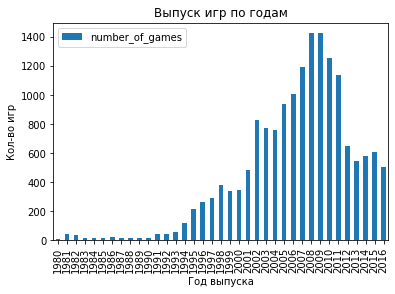

In [36]:
data_of_years.query('year_of_release > 1001').plot( kind = 'bar', x = 'year_of_release', y = 'number_of_games') #создаем график
plt.title('Выпуск игр по годам') #называем таблицу
plt.ylabel('Кол-во игр') #назовем сторону y
plt.xlabel('Год выпуска') #назовем сторону x

###### Вывод
Больше всего игр было выпущено в 2008 и 2009 годах, что соответсвует 1429 и 1426 шт. После этих лет началось падение в кол-ве выпусков. Для анализа выпущенных игр интересно использовать данные с 2012,когда кол-во игр сопоставимо с текущими. 

In [37]:
#Посмотрим, как менялись продажи по платформам
pl = first_data.pivot_table(index = ['platform'],values = 'all_sales', aggfunc = 'sum').reset_index() #сделаем сводную таблицу по продажам через платформы
top = pl.sort_values(by = 'all_sales', ascending = False) #отфильтруем столбец по продажам
top_6 = top.loc[[16,28,26,17,4,15],:] #выведем только top 6 самых поппулярных платформ так как по ним самые высокие продажи, уже у следуюшей в списке платформ продажи в 2 раза ниже
top_6

,platform,all_sales
16,PS2,1062.33
28,X360,885.66
26,Wii,828.44
17,PS3,803.97
4,DS,746.86
15,PS,689.95


In [38]:
#выведем только продажи с top6 платформ по годам за которые есть полные данные
top = first_data.query('platform == "PS2" or platform == "X360" or platform == "Wii" or platform == "PS3" or platform == "DS" or platform == "PS"')
top_platforms = top.query('year_of_release > 1001 and year_of_release < 2016').pivot_table(index = "year_of_release",columns = 'platform',values = 'all_sales', aggfunc = 'sum')
top_platforms

platform,DS,PS,PS2,PS3,Wii,X360
year_of_release,,,,,,
1985,0.02,NaN,NaN,NaN,NaN,NaN
1994,NaN,5.63,NaN,NaN,NaN,NaN
1995,NaN,34.00,NaN,NaN,NaN,NaN
1996,NaN,89.16,NaN,NaN,NaN,NaN
1997,NaN,128.30,NaN,NaN,NaN,NaN
1998,NaN,160.44,NaN,NaN,NaN,NaN
1999,NaN,136.61,NaN,NaN,NaN,NaN
2000,NaN,91.09,35.59,NaN,NaN,NaN
2001,NaN,33.42,149.65,NaN,NaN,NaN


Text(0.5, 0, 'Год выпуска')

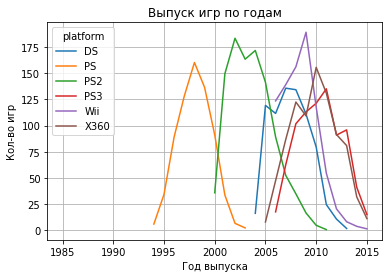

In [39]:
top_platforms.plot(grid = True)
plt.title('Выпуск игр по годам') #называем таблицу
plt.ylabel('Кол-во игр') #назовем сторону y
plt.xlabel('Год выпуска') #назовем сторону x

###### Вывод  
Больше всего заработок получился по платформам DS,PS,PS2,PS3,Wii,X360. Каждая из них показывает средний срок жизни в 10-11 лет, с 1 или двумя пиками. При этом с годами кол-во топовых платформ увеличивается, пик их появления пришелся на 2004-2006 года. 

###### Исследуемый период  
Актуальным периодом будем считать период с 2012 года, так как здесь намечается спад по всем ранее поппулярным платформам. Данный период позводит лучше простроить прогноз на 2017 год, зная основные циклы жизни платформ.

In [40]:
#выведем продажи с 2012 года по платформам
actual = first_data.query('year_of_release > 2011').pivot_table(index = "year_of_release",columns = 'platform',values = 'all_sales', aggfunc = 'sum')
actual

platform,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,,
2012,48.77,10.42,20.41,90.87,NaN,7.56,13.65,20.22,16.30,91.45,NaN
2013,53.97,1.42,11.27,95.85,22.12,3.10,9.14,7.87,20.12,80.82,17.21
2014,41.75,NaN,12.38,40.88,84.22,0.24,10.56,3.45,20.35,31.61,49.26
2015,26.75,NaN,7.93,14.70,100.44,0.12,5.93,1.05,15.22,10.86,54.67
2016,14.50,NaN,4.89,3.23,59.01,NaN,4.10,0.17,4.25,1.40,23.91


##### Вывод
Потенциально более прибыльными платформами в 2017 году станут PS4 и XOne, так как они появились только в 2013 году, а значит 2017 - будет их пик по поппулряности, если следовать тренду других. 

<div style="border:solid green 2px; padding: 20px"> 

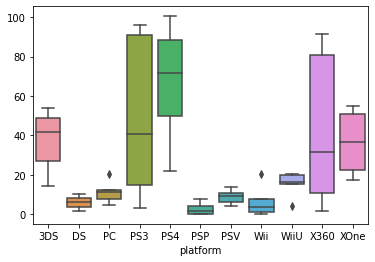

In [41]:
#построим график с усами
sns.boxplot(data = actual)

###### Вывод  
Через "график с усами" видно, что медиана у платформ PS3,X360, PSP, WII и WIIU располагается левее, что означает, что в указанный период продажи находились в нисходящем тренде.   
PS4 имеет длинные усы, особенно левый, что говорит о больших разбросах значений и их резком росте, в отличии от XOne, где медиана также ближе к середине, а вот выбросов почти нет.


In [42]:
#Изменим типы данных и заменим текстовое значение tbt на условное 11 для опредления коэфициента Пирсона
first_data['critic_score'] = first_data['critic_score'].astype('float')
first_data['user_score'] = first_data['user_score'].replace("tbd", 11)
first_data['user_score'] = first_data['user_score'].astype('float')

In [43]:
#исслудем зависимость значений друг от друга в актуальном периоде
reviews = first_data.query('year_of_release > 2011')
reviews.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,all_sales
year_of_release,1.000000,-0.092848,-0.053163,-0.063587,-0.057375,0.054704,0.007975,-0.086101
na_sales,-0.092848,1.000000,0.767484,0.271010,0.792277,-0.054316,-0.191281,0.925984
eu_sales,-0.053163,0.767484,1.000000,0.265134,0.936906,-0.047685,-0.184522,0.911745
jp_sales,-0.063587,0.271010,0.265134,1.000000,0.203078,0.060536,0.096373,0.480363
other_sales,-0.057375,0.792277,0.936906,0.203078,1.000000,-0.045689,-0.175248,0.881946
critic_score,0.054704,-0.054316,-0.047685,0.060536,-0.045689,1.000000,0.697278,-0.036544
user_score,0.007975,-0.191281,-0.184522,0.096373,-0.175248,0.697278,1.000000,-0.161923
all_sales,-0.086101,0.925984,0.911745,0.480363,0.881946,-0.036544,-0.161923,1.000000


###### Вывод  
Оценка критиков и пользователей зависят друг от друга на 77%. При этом в каждом регионе продажи имеют в среднем 19% обратную зависимость от оценки критиков/пользователей. То есть, чем выше продажи, тем ниже оценка, что соотносится с правилом: чем больше отзывов, тем ниже оценка даже у самого ТОП продукта. И все же данное правило не работает для продаж в Японии. Там оценка критика имеет прямую 3% зависимость от оценки критиов/пользователей. 

In [44]:
#изучим зависимость отзывов с выручкой теряющей поппулярность PS3 в актуальном периоде
reviews_PS3 = first_data.query('year_of_release > 2011 and platform == "PS3"')
reviews_PS3.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,all_sales
year_of_release,1.000000,-0.174893,-0.126485,-0.132418,-0.141873,0.385894,0.141688,-0.160666
na_sales,-0.174893,1.000000,0.842724,0.370904,0.896182,-0.054201,-0.226386,0.945308
eu_sales,-0.126485,0.842724,1.000000,0.382929,0.981766,-0.025179,-0.189317,0.964710
jp_sales,-0.132418,0.370904,0.382929,1.000000,0.393358,-0.066628,-0.027215,0.478251
other_sales,-0.141873,0.896182,0.981766,0.393358,1.000000,-0.028629,-0.182251,0.979156
critic_score,0.385894,-0.054201,-0.025179,-0.066628,-0.028629,1.000000,0.602958,-0.044639
user_score,0.141688,-0.226386,-0.189317,-0.027215,-0.182251,0.602958,1.000000,-0.207363
all_sales,-0.160666,0.945308,0.964710,0.478251,0.979156,-0.044639,-0.207363,1.000000


Text(0.5, 0, 'Оценки пользователей')

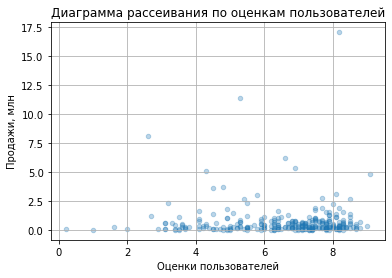

In [45]:
#сформируем диаграмму рассеивания с оценками пользователей
reviews_PS3.query('user_score <10').plot(kind = 'scatter', x = "user_score", y = "all_sales", grid = True, alpha = 0.3)
plt.title('Диаграмма рассеивания по оценкам пользователей') #называем таблицу
plt.ylabel('Продажи, млн') #назовем сторону y
plt.xlabel('Оценки пользователей') #назовем сторону x

Text(0.5, 0, 'Оценки пользователей')

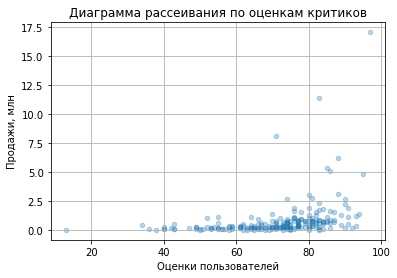

In [46]:
#сформируем диаграмму рассеивания с оценками критика
reviews_PS3.query('critic_score <100').plot(kind = 'scatter', x = "critic_score", y = "all_sales", grid = True, alpha = 0.3)
plt.title('Диаграмма рассеивания по оценкам критиков') #называем таблицу
plt.ylabel('Продажи, млн') #назовем сторону y
plt.xlabel('Оценки пользователей') #назовем сторону x

In [47]:
#посмотрим более детально на артефакты в нашей выборке
reviews_PS3.query('all_sales > 7.5')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,17.09
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,11.37
69,Call of Duty: Ghosts,PS3,2013,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,8.11


###### Вывод
В акутальном периоде на платформе PC3 немногим более ярко заметна обратная зависимость между продажами и отзывами критиков/пользователей. Здесь показатели зависят на 23% друг от друга.  
Большая же часть оценок пользователей располагается в диапазоне до 60 до 85, а критиков от 6 до 9, что сопоставимо.
При этом есть 3 игры, в которых продажи по миру многим больше, чем у всех остальных: "Grand Theft Auto V", "Call of Duty: Black Ops II", "Call of Duty: Ghosts". Среди же этих трех игр чем больше выручка, тем лучше оценки.

Text(0.5, 0, 'Оценки пользователей')

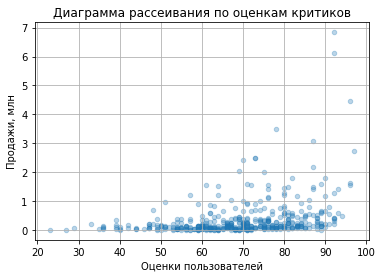

In [48]:
#проверим на случайной платформе распределение оценок критика
reviews_GC = first_data.query('platform == "GC"')
reviews_GC.query('critic_score<100').plot(kind = 'scatter', x = "critic_score", y = "all_sales", grid = True, alpha = 0.3)
plt.title('Диаграмма рассеивания по оценкам критиков') #называем таблицу
plt.ylabel('Продажи, млн') #назовем сторону y
plt.xlabel('Оценки пользователей') #назовем сторону x

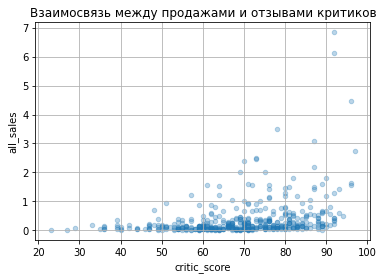

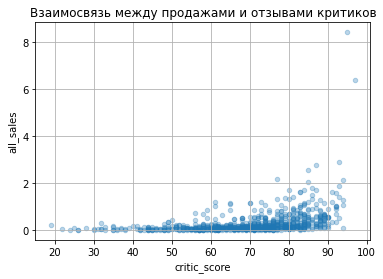

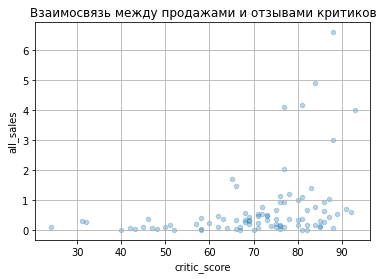

In [49]:
#проверим на нескольких платформах зависимость выручки от отзывов критиков
platforms = ('GC', 'XB', 'WiiU')
for platform in platforms:
    first_data[(first_data['platform'] == platform)].query('critic_score<100').plot(kind='scatter', x='critic_score', y='all_sales',grid = True, alpha = 0.3) 
    plt.title('Взаимосвязь между продажами и отзывами критиков')

###### Вывод  
Изучая несколько случайных платформ, а именно 'GC', 'XB', 'WiiU' по отзывам критика, подверждаются более ранние выводы: чем меньше оценок, тем она выше. При этом на всех платформах одинакого много не оwененных игр, при том, что многие из них имеют весьма высокие продажи. 

In [50]:
#Исследуем распределение по жанрам
genre = reviews.pivot_table(index = "genre", values = "all_sales", aggfunc = ["sum", "count"]).reset_index()
genre.columns = ['genre', 'all_sales', 'number_of_games']
genre["revenue_from_one_game"] = genre['all_sales']/genre['number_of_games'] #добавляем столбец с выручкой на 1 игру
genre.sort_values(by = "all_sales", ascending = False)

,genre,all_sales,number_of_games,revenue_from_one_game
0,Action,389.98,1031,0.378254
8,Shooter,267.47,235,1.138170
7,Role-Playing,177.97,370,0.481000
10,Sports,158.63,268,0.591903
3,Misc,77.37,192,0.402969
4,Platform,55.42,85,0.652000
6,Racing,47.01,115,0.408783
2,Fighting,40.02,109,0.367156
9,Simulation,32.93,80,0.411625
1,Adventure,26.62,302,0.088146


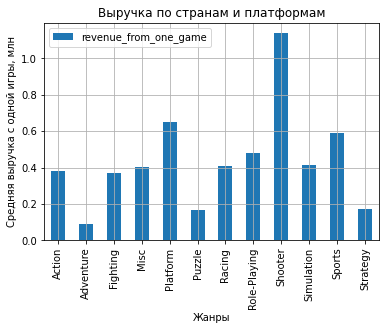

In [51]:
genre.plot(kind = 'bar', x = 'genre', y = 'revenue_from_one_game', grid = True)
plt.title('Выручка по странам и платформам') #называем таблицу
plt.ylabel('Средняя выручка с одной игры, млн') #назовем сторону y
plt.xlabel('Жанры') #назовем сторону x
plt.show()

###### Вывод
С точки зрения жанра самым зарабатываемым является "Action" с результатом почти в 390 млн копий, а на последнем месте - "Puzzle" с 4.67 млн копий  
Однако, кол-во игр проданных в рамках каждого жанра разниться почти в 37 раз от меньшего к большему.
Введу чего интересно обратить внимание на жанр "Shooter" с 1.14 млн копий на одну игру в этом жанре, в сравнии с лидером по выручке у которого всего 0.38 млн копий


#### Шаг 4. Портрет пользователя каждого региона <a id="4"></a>

In [52]:
#исследуем продажи на каждой платформе в каждом регионе
platform_by_region = reviews.pivot_table(index = 'platform', values = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], aggfunc = ['sum']).reset_index()
platform_by_region.columns = ['platform', 'eu_sales', 'jp_sales', 'na_sales', 'other_sales']
platform_by_region

,platform,eu_sales,jp_sales,na_sales,other_sales
0,3DS,42.64,87.79,55.31,8.87
1,DS,3.53,3.72,4.59,0.71
2,PC,37.76,0.00,19.12,5.77
3,PS3,106.86,35.29,103.38,43.26
4,PS4,141.09,15.96,108.74,48.35
5,PSP,0.42,10.47,0.13,0.17
6,PSV,11.36,21.04,10.98,5.80
7,Wii,11.92,3.39,17.45,2.61
8,WiiU,25.13,13.01,38.10,5.95
9,X360,74.52,1.57,140.05,20.40


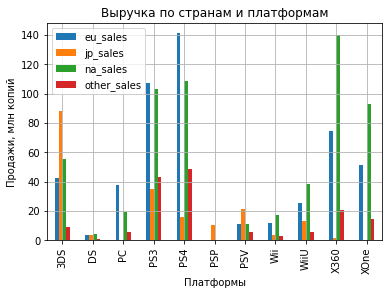

In [53]:
platform_by_region.plot(kind = 'bar', x = 'platform', grid = True)
plt.title('Выручка по странам и платформам') #называем таблицу
plt.ylabel('Продажи, млн копий') #назовем сторону y
plt.xlabel('Платформы') #назовем сторону x
plt.show()

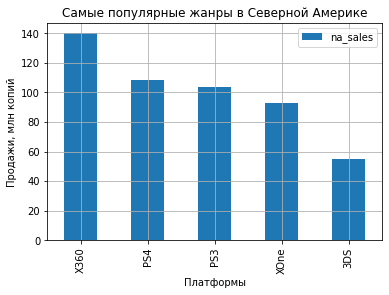

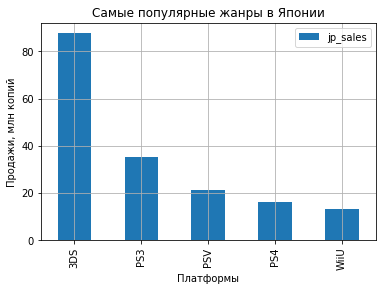

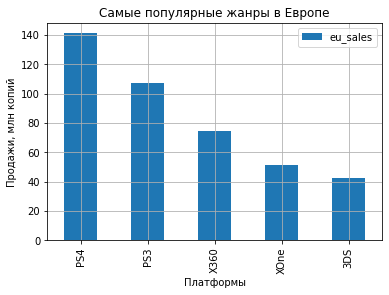

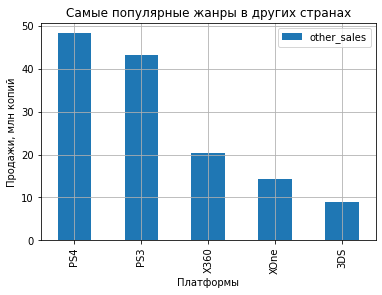

In [54]:
#построим графики TOP-5 по продажам в каждом регионе
reviews.groupby(by='platform').agg({'na_sales':'sum'}).reset_index().sort_values(by='na_sales', ascending=False).head(5).plot(kind = 'bar', x = 'platform', grid = True)
plt.title('Самые популярные жанры в Северной Америке')
plt.ylabel('Продажи, млн копий') #назовем сторону y
plt.xlabel('Платформы') #назовем сторону x
reviews.groupby(by='platform').agg({'jp_sales':'sum'}).reset_index().sort_values(by='jp_sales', ascending=False).head(5).plot(kind = 'bar', x = 'platform', grid = True)
plt.title('Самые популярные жанры в Японии')
plt.ylabel('Продажи, млн копий') #назовем сторону y
plt.xlabel('Платформы') #назовем сторону x
reviews.groupby(by='platform').agg({'eu_sales':'sum'}).reset_index().sort_values(by='eu_sales', ascending=False).head(5).plot(kind = 'bar', x = 'platform', grid = True)
plt.title('Самые популярные жанры в Европе')
plt.ylabel('Продажи, млн копий') #назовем сторону y
plt.xlabel('Платформы') #назовем сторону x
reviews.groupby(by='platform').agg({'other_sales':'sum'}).reset_index().sort_values(by='other_sales', ascending=False).head(5).plot(kind = 'bar', x = 'platform', grid = True)
plt.title('Самые популярные жанры в других странах')
plt.ylabel('Продажи, млн копий') #назовем сторону y
plt.xlabel('Платформы') #назовем сторону x
plt.show()

In [55]:
#определим долю каждой платформы в каждом регионе в продажах
for region_sales in ['na_sales', 'eu_sales', 'jp_sales','other_sales']:
    sum_of_region_sales = reviews[region_sales].sum()
    temp = reviews.pivot_table(index='platform', values=region_sales, aggfunc='sum').sort_values(by=region_sales, ascending=False).head(5)
    temp['share'] = (temp[region_sales]/sum_of_region_sales).map('{:.1%}'.format)
    display(temp)
    print()

,na_sales,share
platform,,
X360,140.05,23.7%
PS4,108.74,18.4%
PS3,103.38,17.5%
XOne,93.12,15.8%
3DS,55.31,9.4%


,eu_sales,share
platform,,
PS4,141.09,27.8%
PS3,106.86,21.1%
X360,74.52,14.7%
XOne,51.59,10.2%
3DS,42.64,8.4%


,jp_sales,share
platform,,
3DS,87.79,45.6%
PS3,35.29,18.3%
PSV,21.04,10.9%
PS4,15.96,8.3%
WiiU,13.01,6.8%


,other_sales,share
platform,,
PS4,48.35,31.0%
PS3,43.26,27.7%
X360,20.40,13.1%
XOne,14.27,9.1%
3DS,8.87,5.7%


###### Вывод  
Самыми крупными рынками являются Северная Америка и Европа. Во всех регионах встречаются в TOP-5 платформ PS4,PS3 и 3DS. 
При этом рынок в Северной Америке максимально дифференцирован по платформам, а вот в Японии в разы больший акцент на родную для них платформу -  3DS. Ее доля на локальном рынке составляет 45.6%

In [56]:
#определим долю каждого жанра в каждом регионе в продажах
for region_sales in ['na_sales', 'eu_sales', 'jp_sales','other_sales']:
    sum_of_region_sales = reviews[region_sales].sum()
    temp = reviews.pivot_table(index='genre', values=region_sales, aggfunc='sum').sort_values(by=region_sales, ascending=False).head(5)
    temp['share'] = (temp[region_sales]/sum_of_region_sales).map('{:.1%}'.format)
    display(temp)
    print()

,na_sales,share
genre,,
Action,177.84,30.1%
Shooter,144.77,24.5%
Sports,81.53,13.8%
Role-Playing,64.00,10.8%
Misc,38.19,6.5%


,eu_sales,share
genre,,
Action,159.34,31.4%
Shooter,113.47,22.4%
Sports,69.09,13.6%
Role-Playing,48.53,9.6%
Racing,27.29,5.4%


,jp_sales,share
genre,,
Role-Playing,65.44,34.0%
Action,52.80,27.4%
Misc,12.86,6.7%
Simulation,10.41,5.4%
Fighting,9.44,4.9%


,other_sales,share
genre,,
Action,51.14,32.7%
Shooter,37.26,23.9%
Sports,22.44,14.4%
Role-Playing,14.83,9.5%
Misc,7.67,4.9%


###### Вывод  
По всему миру самыми популярными жанрами на всех платформах являются Action, Shooter, Sports и Role-Playing, исключением является Яплония, где в TOP-5 вообще не попадают Shooter. Они замещены Role-Playing. Данные особенности связаны с закрытостью данного рынка и зависит в том числе и от платформ, которые используют пользователи в разных регионах.  

In [57]:
#определим долю каждого рейтинга в каждом регионе 
for region_sales in ['na_sales', 'eu_sales', 'jp_sales','other_sales']:
    sum_of_region_sales = reviews[region_sales].sum()
    temp = reviews.pivot_table(index='rating', values=region_sales, aggfunc='sum').sort_values(by=region_sales, ascending=False).head(5)
    temp['share'] = (temp[region_sales]/sum_of_region_sales).map('{:.1%}'.format)
    display(temp)
    print()

,na_sales,share
rating,,
M,231.57,39.2%
E,114.37,19.4%
1000,103.31,17.5%
E10+,75.70,12.8%
T,66.02,11.2%


,eu_sales,share
rating,,
M,193.96,38.3%
E,113.03,22.3%
1000,91.50,18.1%
E10+,55.37,10.9%
T,52.96,10.4%


,jp_sales,share
rating,,
1000,108.84,56.5%
E,28.33,14.7%
T,26.02,13.5%
M,21.20,11.0%
E10+,8.19,4.3%


,other_sales,share
rating,,
M,63.38,40.6%
E,31.44,20.1%
1000,27.17,17.4%
T,17.94,11.5%
E10+,16.23,10.4%


###### Вывод  
Согласно рейтингу ESRB весь мир находится примерно на одном уровне, то есть порядка 40% имеют взрослый рейтинг,20% - для детей от 3х лет, 18%-неопределен рейтинг, 11% - для подростков и 10% - E10+  - для детей старше 10 лет.
При этом столь значительный % неоцененных игр имеется, так как данный рейтинг присваивается частной некоммерческой организацией из США, а значит и локальные игры не будут оценены, что видно по рынку Японии. 

##### Шаг 5. Проверяем Гипотезы <a id="5"></a>

Нулевая Гипотеза - Средние пользовательские рейтинги платформ Xbox One и PC равны  
Альтернативная гипотеза - Средние пользовательские рейтинги платформ Xbox One и PC отличаются

In [58]:
#определяем дисперсии выборок
var1 = reviews.query('platform == "XOne"')['user_score']
var3 = reviews.query('platform == "PC"')['user_score']

In [59]:
var2 = np.std(var1)
var2

2.2992869868229318

In [60]:
var4 = np.std(var3)
var4

2.3026892452087386

In [61]:
alpha = 0.05  # критический уровень статистической значимости

results = st.ttest_ind(reviews.query('platform == "XOne"')['user_score'],reviews.query('platform == "PC"')['user_score'], equal_var = False)
# выбран параметр equal_var = False, так как дисперсии выборок не равны
print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.024459213374860758
Отвергаем нулевую гипотезу


###### Вывод  
Средние пользовательские рейтинги платформ Xbox One и PC в исследуемый период отличаются

Нулевая гипотеза - Средние пользовательские рейтинги жанров Action  и Sports Не разные  
Альтернативная гипотеза - Средние пользовательские рейтинги жанров Action  и Sports разные

In [62]:
#определяем дисперсии выборок
var5 = reviews.query('genre == "Action"')['user_score']
var6 = reviews.query('genre == "Sports"')['user_score']

In [63]:
var7 = np.std(var5)
var7

2.3050132223430158

In [64]:
var8 = np.std(var6)
var8

2.877512534473968

In [65]:
alpha = 0.05  # критический уровень статистической значимости

results = st.ttest_ind(reviews.query('genre == "Action"')['user_score'],reviews.query('genre == "Sports"')['user_score'], equal_var = False)
# выбран параметр equal_var = False, так как дисперсии выборок не равны
print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  3.362831594209793e-21
Отвергаем нулевую гипотезу


###### Вывод  
Средние пользовательские рейтинги жанров Action  и Sports отличаются в исследуемом периоде значительно друг от друга


<div style="border:solid green 2px; padding: 20px"> 
  

### Общий вывод   <a id="6"></a>

Для более успешного расходования денежных средств на рекламу в 2017 году необходимо учесть несколько закономерностей:    
    1. Каждая игровая платформа имеет цикл своей жизни примерно в 10-11 лет, восхождение же занимает от года до 4х.  
    2. В связи с этим платформы PS4 и XOne в 2017 будут на пике поппулярности  
    3. В игры, представленные на платформы PS3, WII вкладывать бюджет не нужно, так как они находятся в нисходящем тренде и скоро закончат свое существование  
    4. Рынки Северной Америки, Европы и Остального мира почти индентичны, за исклоючением Японии  
    5. Рынок Японии отличается от всего остального мира спецификой пользователей ( не играют в Шутеры, а играют в RPG), отсутствием оценок рейтинга ESRB на 44% игр и особенностью платформ (3DS генерит более 40% всей выручки по региону)  
    6. Оценки пользователей и критиков сопоставимы и имеют примерно 23% влияние на уровень продаж игр  
    7. Чем больше оценок у игры, тем более корректно определен ее рейтинг, то есть игры с небольшими продажами, а соответсвенно и небольшим кол-вом оценок имеют более высокие оценки  
    8. Наибольшую выручку приносят игры в жанре Шутер, что почти в 2 раза выше в сравнении с жанрами на 2 и 3 месте топа